### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')

from sklearn.model_selection import train_test_split


### Load the data

In [3]:
data=pd.read_csv('RestaurantDataset.csv')

In [5]:
pd.set_option('display.max_columns',None)

### * Predictive Modeling *

#### Task :

#### Build a regression model to predict theaggregate rating of a restaurant based onavailable features. Split the dataset into training and testing setsand evaluate the model's performance usingappropriate metrics.
#### Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance

### Basic Checks

#### Display the first few rows of the dataset to understand its structure and preview the data.

In [12]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Check the dataset's structure, data types, and identify any missing values or anomalies.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

* Dataset Size: The dataset contains 9,551 entries and 21 columns.

* Data Types:
  Numerical: 3 float64 columns (e.g., Longitude, Latitude, Aggregate rating) and 5 int64 columns (e.g., Restaurant ID, Votes).
  
  Categorical: 13 object columns (e.g., Restaurant Name, Cuisines, Rating text).

* Missing Values:
The column Cuisines has some missing values (9542 non-null out of 9551), which need handling during preprocessing.

* Key Features:
  * Geolocation: Columns like Longitude and Latitude can help analyze location-based trends.

  * Price and Ratings: Columns such as Price range, Aggregate rating, and Votes are likely significant predictors for the target variable.

  * Binary Flags: Columns like Has Table booking, Has Online delivery, and Is delivering now may capture important service-related insights.

#### Generate summary statistics for numerical and categorical columns in the dataset

In [19]:
data.describe() 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


1. Dataset Size and Completeness:
* All columns have 9551 non-null entries, indicating no missing values in these numerical features.

2. Restaurant ID:
* Unique identifier with no direct analytical value.
* Range: 53 to 18,500,650 (highly variable due to its nature as an ID).

3. Country Code:
* Mean: 18.37 and standard deviation: 56.75 suggest multiple country codes.
* Min: 1, Max: 216 indicates there are at least 216 possible countries in the data.

4. Geolocation (Longitude & Latitude):
* Longitude ranges from -157.95 to 174.83 and Latitude from -41.33 to 55.98.
* Indicates the dataset spans multiple geographic regions globally.
* Outliers might exist if these values fall outside typical geographic bounds.

5. Average Cost for Two:
* Mean: 1199.21, but the std: 16121.18 highlights extreme variability.
* Min: 0, Max: 800,000 suggests some extreme outliers that may skew results.
* Focus on filtering out outliers during analysis.

6. Price Range:
* Limited range (1 to 4) with most values concentrated around 1 and 2 (based on the percentiles).
* A categorical variable suitable for bivariate analysis.

7. Aggregate Rating:
* Mean rating: 2.67, and max: 4.9, indicating generally moderate ratings.
* Distribution is likely skewed, with many ratings falling below the mean due to the min: 0 and wide spread.

8. Votes:
* Mean: 156.91, but the high std: 430.17 suggests variability in popularity.
* Max: 10,934 indicates a few restaurants receive significantly more attention.
* Min: 0 suggests some restaurants have no votes, which may correlate with low ratin

In [22]:
data.describe(include=['O'])    # Categorical columns

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


1. Restaurant Name:
7446 unique restaurant names, with "Cafe Coffee Day" being the most frequent (appearing 83 times).

2. City:
141 unique cities. "New Delhi" appears most frequently (5473 times), indicating the dataset is heavily centered around this city.

3. Address:
8918 unique addresses. "Dilli Haat, INA, New Delhi" is the most common.

4. Locality and Locality Verbose:
1208 unique localities, with "Connaught Place" being the most frequent in both "Locality" and "Locality Verbose" columns.

5. Cuisines:
1825 unique cuisines, with "North Indian" being the most common (936 occurrences).

6. Currency:
12 unique currencies, with the majority in "Indian Rupees (Rs.)" (8652 entries).

7. Has Table Booking, Has Online Delivery, Is Delivering Now, Switch to Order Menu:
These columns are mostly binary ("Yes"/"No").
Has Table Booking: "No" is the most common response (8393).
Has Online Delivery, Is Delivering Now, Switch to Order Menu: All predominantly have "No" responses.

8. Rating Color and Rating Text:
Rating Color: Only one rating color (Orange) is used across the dataset.
Rating Text: "Average" is the most frequent rating text, occurring 3737 times.


Key Takeaways:
The dataset is heavily biased towards New Delhi and North Indian cuisine.
Most restaurants do not offer online delivery, table bookings, or delivery at the moment.
The ratings are mainly "Average," and there's little variety in rating colors.

### Data preprocessing

#### 1. Handle missing values

In [27]:
# Checking missing values
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


##### The dataset has 9 missing values in the 'Cuisines' column, while all other columns have no missing values. 

In [30]:
# Find the mode of the Cuisines column
mode_cuisine = data['Cuisines'].mode()[0]

print("Mode of Cuisines column:", mode_cuisine)

Mode of Cuisines column: North Indian


In [32]:
# Replace missing values in 'Cuisines' 

data.loc[data['Cuisines'].isnull(), 'Cuisines'] = 'North Indian'

In [34]:
# Verify that there are no missing values in 'Cuisines' now

print(f"Missing values in 'Cuisines': {data['Cuisines'].isnull().sum()}")

Missing values in 'Cuisines': 0


In [36]:
df = data.copy()

#### 2. Encode categorical variables

In [39]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

##### Has Table booking

In [42]:
#checking unique value in 'Has Table booking' column
data['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
# Mnual encoding
data['Has Table booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})

##### Has Online delivery

In [47]:
#checking unique value in 'Has Online delivery' column
data['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})

##### Is delivering now

In [52]:
#checking unique values in 'Is delivering now' column
data['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
data['Is delivering now'] = data['Is delivering now'].map({'Yes':1,'No':0})

##### Rating color

In [57]:
data['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [59]:
data['Rating color'] = data['Rating color'].map({'Dark Green':5, 'Green':4, 'Yellow':3, 'Orange':2, 'White':1, 'Red':0})

##### Rating text

In [62]:
data['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [64]:
data['Rating text'] = data['Rating text'].map({'Excellent':5, 'Very Good':4, 'Good':3, 'Average':2, 'Not rated':1, 'Poor':0})

In [66]:
# Applying mean encoding for the remaining features as they have more unique values

In [68]:
## Creating independent and dependent variable
X = data.drop('Aggregate rating',axis=1)#independent variable 
y = data['Aggregate rating']#dependent variable 

In [70]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##### City

In [73]:
# Compute mean encoding for 'City' from the entire dataset
city_means = data.groupby('City')['Aggregate rating'].mean().round(1)

# Map the mean encoding back to the original data
data['City'] = data['City'].map(city_means)

# Handle missing values in the original data
data['City'].fillna(data['Aggregate rating'].mean().round(1), inplace=True)

# Convert 'City' column to numeric type in the original data
data['City'] = data['City'].astype(float)

##### Currency

In [76]:
# Target Encoding for 'Currency' with rounding to 1 decimal place
currency_means = data.groupby('Currency')['Aggregate rating'].mean().round(1)

# Map the mean encoded 'Currency' values to the original data
data['Currency'] = data['Currency'].map(currency_means)

# Handle missing values by filling with the overall mean of 'Aggregate rating'
data['Currency'].fillna(data['Aggregate rating'].mean().round(1), inplace=True)

# Convert 'Currency' column to numeric type
data['Currency'] = data['Currency'].astype(float)

##### Cuisines

In [79]:
# Target Encoding for 'Cuisines' with rounding to 1 decimal place
cuisines_means = data.groupby('Cuisines')['Aggregate rating'].mean().round(1)

# Map the mean encoded 'Cuisines' values to the original data
data['Cuisines'] = data['Cuisines'].map(cuisines_means)

# Handle missing values by filling with the overall mean of 'Aggregate rating'
data['Cuisines'].fillna(data['Aggregate rating'].mean().round(1), inplace=True)

# Convert 'Cuisines' column to numeric type
data['Cuisines'] = data['Cuisines'].astype(float)

##### Address

In [82]:
# Target Encoding for 'Address' with rounding to 1 decimal place
address_means = data.groupby('Address')['Aggregate rating'].mean().round(1)

# Map the mean encoded 'Address' values to the original data
data['Address'] = data['Address'].map(address_means)

# Handle missing values by filling with the overall mean of 'Aggregate rating'
data['Address'].fillna(data['Aggregate rating'].mean().round(1), inplace=True)

# Convert 'Address' column to numeric type
data['Address'] = data['Address'].astype(float)


##### Locality

In [85]:
# Target Encoding for 'Locality' with rounding to 1 decimal place
locality_means = data.groupby('Locality')['Aggregate rating'].mean().round(1)

# Map the mean encoded 'Locality' values to the original data
data['Locality'] = data['Locality'].map(locality_means)

# Handle missing values by filling with the overall mean of 'Aggregate rating'
data['Locality'].fillna(data['Aggregate rating'].mean().round(1), inplace=True)

# Convert 'Locality' column to numeric type
data['Locality'] = data['Locality'].astype(float)

##### Locality Verbose

In [88]:
# Target Encoding for 'Locality Verbose' with rounding to 1 decimal place
locality_verbose_means = data.groupby('Locality Verbose')['Aggregate rating'].mean().round(1)

# Map the mean encoded 'Locality Verbose' values to the original data
data['Locality Verbose'] = data['Locality Verbose'].map(locality_verbose_means)

# Handle missing values by filling with the overall mean of 'Aggregate rating'
data['Locality Verbose'].fillna(data['Aggregate rating'].mean().round(1), inplace=True)

# Convert 'Locality Verbose' column to numeric type
data['Locality Verbose'] = data['Locality Verbose'].astype(float)

# Verify the changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   float64
 4   Address               9551 non-null   float64
 5   Locality              9551 non-null   float64
 6   Locality Verbose      9551 non-null   float64
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   float64
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   float64
 12  Has Table booking     9551 non-null   int64  
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   int64  
 15  Switch to order menu 

In [90]:
data=data.drop(['Restaurant Name','Switch to order menu'],axis=1)

Skipped encoding 'Restaurant Name' due to a high number of unique values, which would add unnecessary complexity

Skipped encoding 'Switch to order menu' as it contains only one unique value, making it non-informative

### Scaling

In [685]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()

# Specify the column to exclude (e.g., 'Aggregate rating')
d1 = ['Aggregate rating']

# Apply StandardScaler to the remaining columns
data1 = sc.fit_transform(data.drop(d1, axis=1))
data1

array([[-0.31093987,  2.53111053,  3.00714087, ...,  2.50533266,
         2.50533266,  0.36520164],
       [-0.31245846,  2.53111053,  3.00714087, ...,  2.50533266,
         2.50533266,  1.0091681 ],
       [-0.31294588,  2.53111053,  3.00714087, ...,  1.58543291,
         1.58543291,  0.26291094],
       ...,
       [-0.3566488 ,  3.34171786,  2.5452342 , ...,  0.66553317,
         0.66553317,  1.17190331],
       [-0.3566141 ,  3.34171786,  2.5452342 , ...,  1.58543291,
         1.58543291,  1.72985259],
       [-0.35532984,  3.34171786,  2.5452342 , ...,  1.58543291,
         1.58543291,  1.0091681 ]])

### Feature Selection

<Axes: >

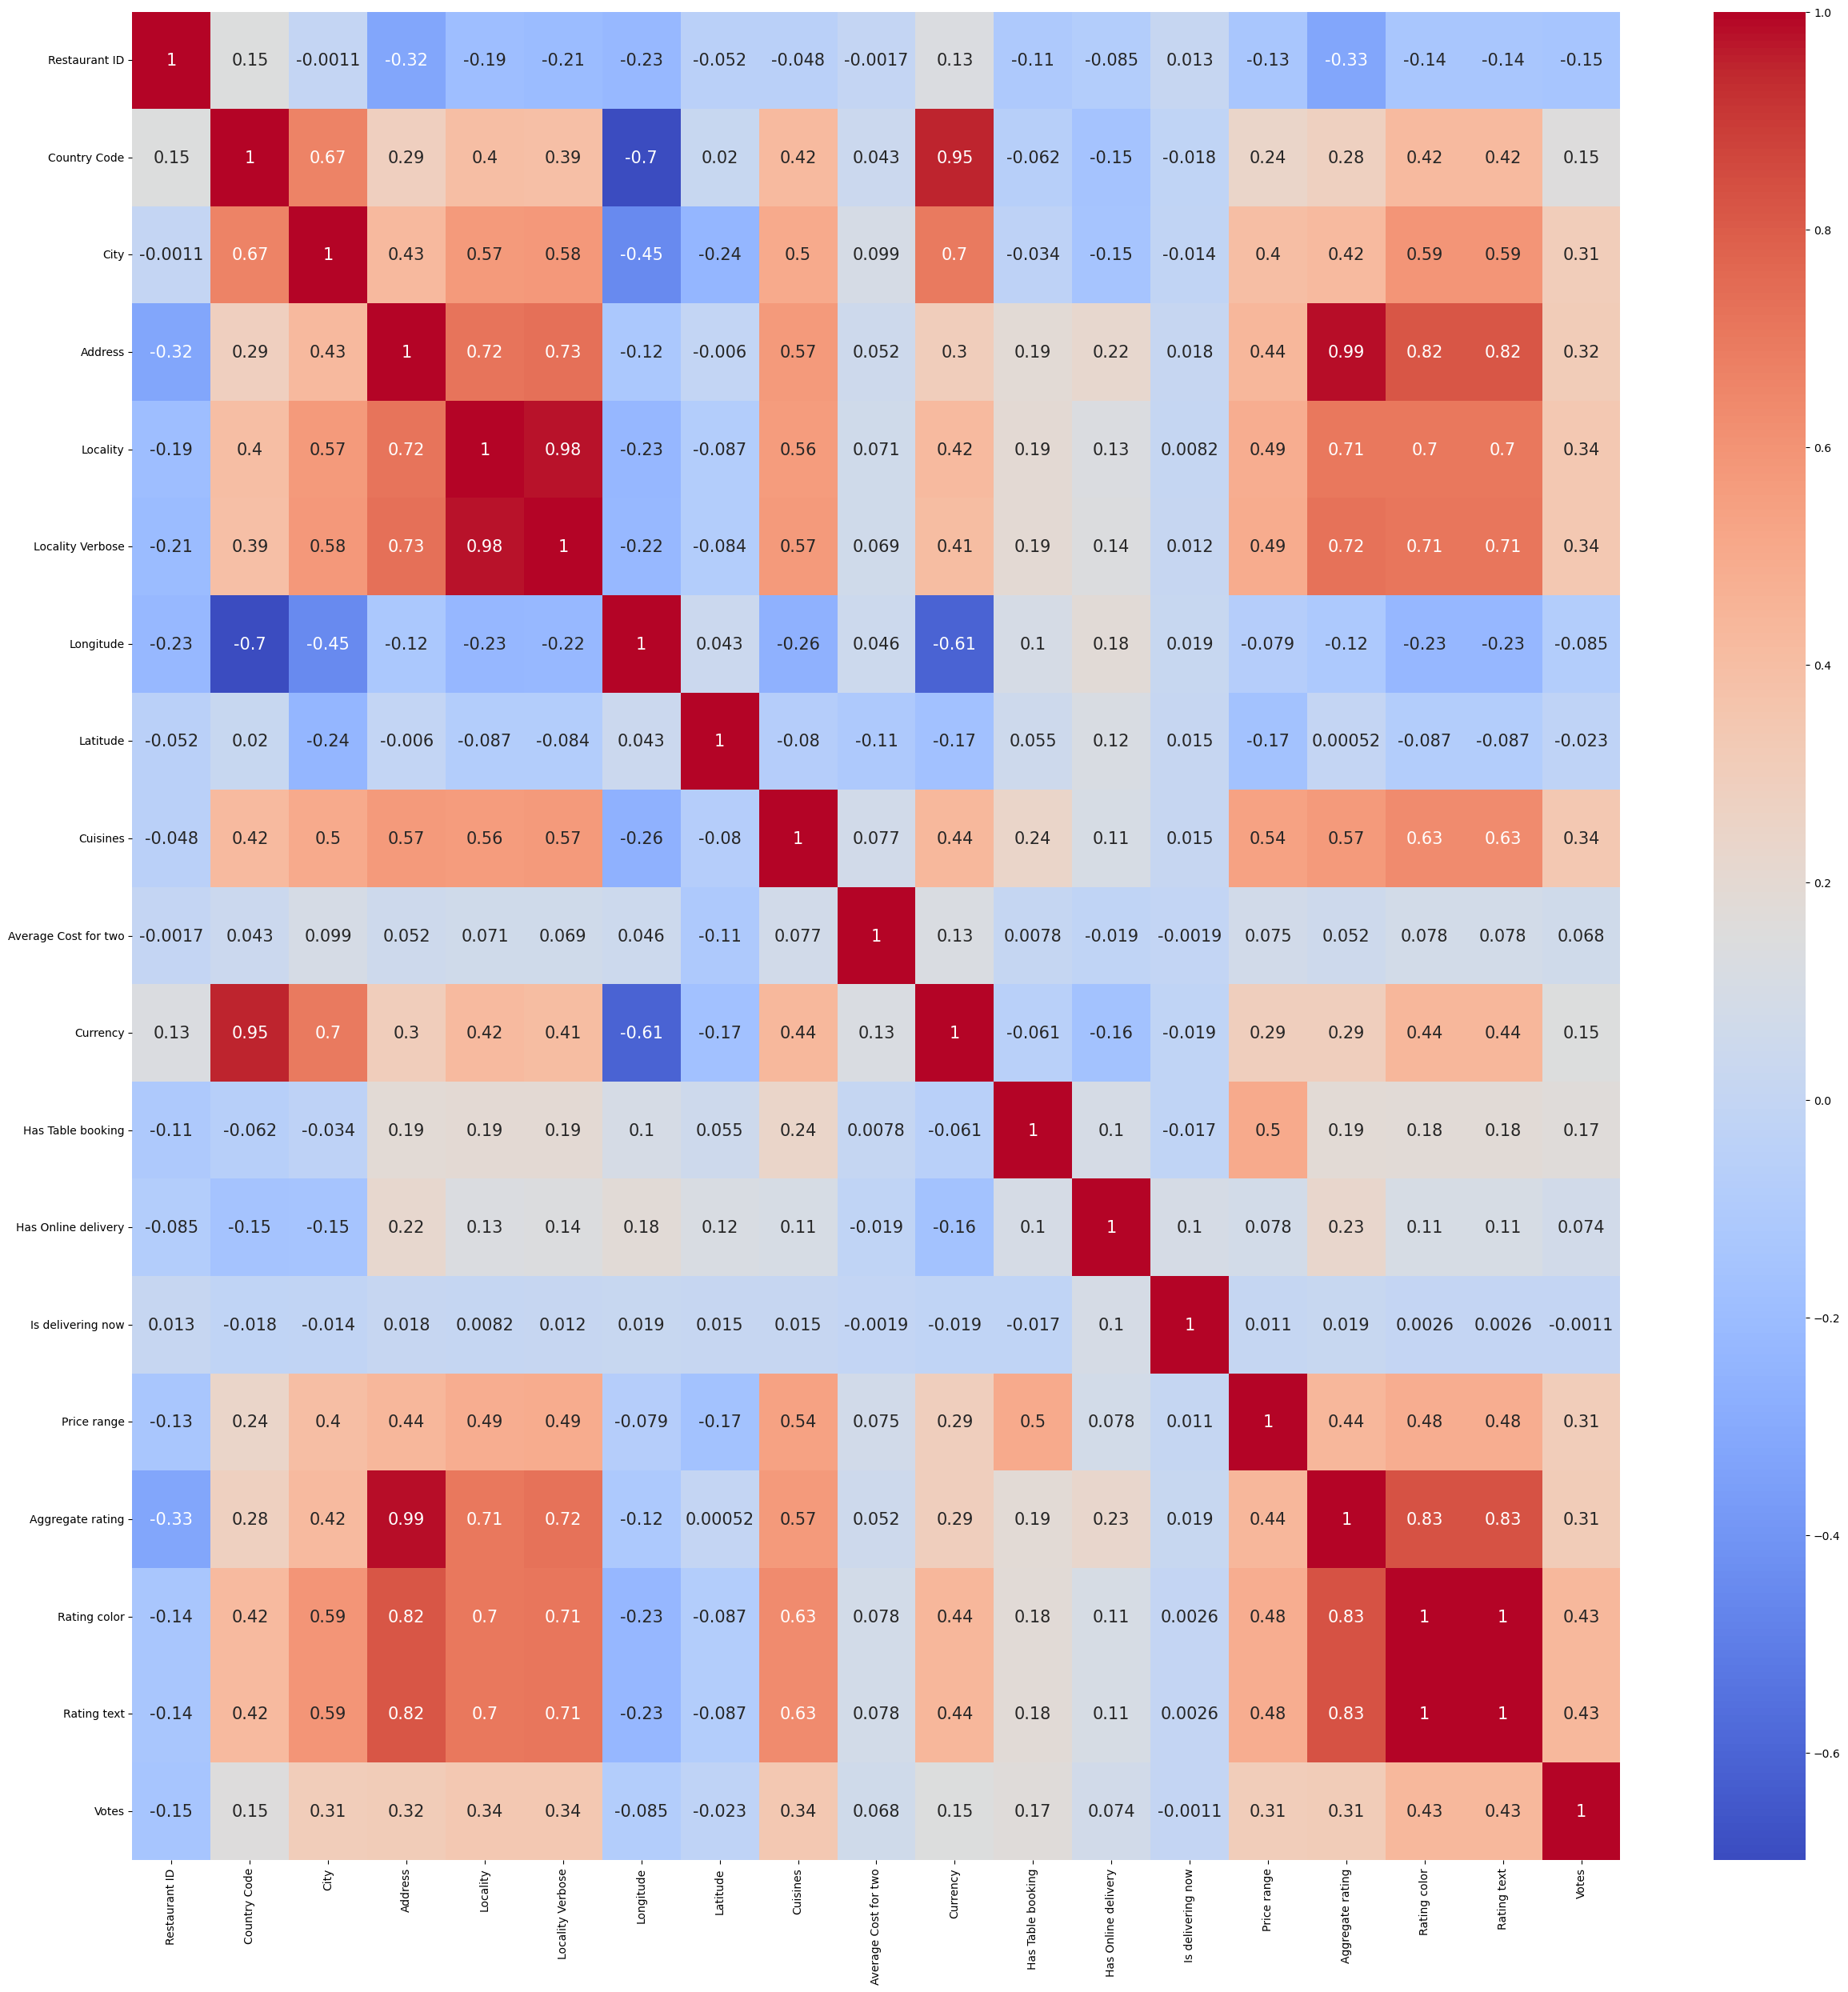

In [688]:
# Plotting a heatmap to visualize the correlation between features in the dataset
plt.figure(figsize=(30,30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", annot_kws={"size":15})#plotting heat map to check correlation

Locality Verbose, Restaurant ID , Longitude , Latitude ,Average Cost for two, Is delivering now - These features are weakly correlated with taget so will drop these columns.
Also, there is multicollinearity in rating test and rating color , so i will drop Rating text.
High multicollinearity in Country Code and currency , remove country code as currency has high correlation with target than curntry code.

In [695]:
data.drop(['Locality Verbose' ,'Restaurant ID' ,'Longitude' ,'Latitude' ,'Average Cost for two', 'Is delivering now', 
               'Country Code','Address' ,'Rating text'],axis=1,inplace=True)
data.head()

,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Votes
0,4.6,4.8,4.8,4.5,1,0,3,4.8,5,314
1,4.6,4.5,3.5,4.5,1,0,3,4.5,5,591
2,4.6,4.4,4.4,4.5,1,0,4,4.4,4,270
3,4.6,4.7,4.0,4.5,0,0,4,4.9,5,365
4,4.6,4.7,4.1,4.5,1,0,4,4.8,5,229


### Model Creation

In [699]:
## Creating independent and dependent variable
X = data.drop('Aggregate rating',axis=1)#independent variable 
y = data['Aggregate rating']#dependent variable 

In [701]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Linear Regression

In [704]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [706]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [708]:
## Model Evaluation
##prediciton on training data
y_train_pred_lr=lr_model.predict(X_train)
from sklearn.metrics import r2_score
train_score_lr=r2_score(y_train,y_train_pred_lr)
train_score_lr

0.7482754421047273

In [710]:
X_train.shape

(7640, 9)

In [712]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.74)*(7640-1)/(7640-9-1)
train_adjusted_r2

0.7396933158584534

In [714]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
test_score_lr=r2_score(y_test,y_pred_lr)
test_score_lr

0.7548157250558961

In [716]:
# Evaluate the model
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"R2: {r2_score(y_test, y_pred_lr)}")

Linear Regression Performance:
MAE: 0.6170159487601734
MSE: 0.5580661324827871
RMSE: 0.7470382403082102
R2: 0.7548157250558961


### Decision Tree Regressor

In [719]:
from sklearn.tree import DecisionTreeRegressor   #importing decision tree from sklearn.tree
dt_model = DecisionTreeRegressor(random_state=42)     #object creation for decision tree  
dt_model.fit(X_train,y_train)   #training the model

DecisionTreeRegressor(random_state=42)

In [721]:
## Model Evaluation
##prediciton on training data
y_train_pred_dt=dt_model.predict(X_train)
train_score_dt=r2_score(y_train,y_train_pred_dt)
train_score_dt

0.9999261229230453

In [723]:
X_train.shape

(7640, 9)

In [725]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.99)*(7640-1)/(7640-9-1)
train_adjusted_r2

0.9899882044560944

In [727]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
test_score_dt=r2_score(y_test,y_pred_dt)
test_score_dt

0.9755828053370479

### Random Forest Regressor

In [730]:
from sklearn.ensemble import RandomForestRegressor   #importing decision tree from sklearn.tree
rf_model = RandomForestRegressor(random_state=42)     #object creation for decision tree  
rf_model.fit(X_train,y_train)   #training the model

RandomForestRegressor(random_state=42)

In [732]:
## Model Evaluation
##prediciton on training data
y_train_pred_rf=rf_model.predict(X_train)
train_score_rf=r2_score(y_train,y_train_pred_rf)
train_score_rf

0.9981881837442941

In [734]:
X_train.shape

(7640, 9)

In [736]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.99)*(7640-1)/(7640-9-1)
train_adjusted_r2

0.9899882044560944

In [738]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
test_score_rf = r2_score(y_test,y_pred_rf)
test_score_rf

0.9871098529431701

In [740]:
model_name = ['Linear Regression','Decision Tree','Random Forest']
r2_score = [test_score_lr,test_score_dt,test_score_rf]
dict = {'Model Name':model_name , 'R2 Score':r2_score}

In [742]:
df1 = pd.DataFrame(dict)
df1

,Model Name,R2 Score
0,Linear Regression,0.754816
1,Decision Tree,0.975583
2,Random Forest,0.987110


Linear Regression : Performs decently but lacks the ability to capture complex, non-linear relationships.

Decision Tree : Significantly better than Linear Regression, effectively modeling non-linear patterns.

Random Forest : Marginally better than Decision Tree, with improved accuracy and robustness due to ensemble averaging.

**Conclusio**n: Random Forest delivers the best performance, with a slight edge over Decision Tree, while Linear Regression lags behind

In [745]:
import pickle 
pickle.dump(rf_model,open('model.pkl','wb'))

### Task 2 : * Customer Preference Analysis *

#### 1. Analyze the relationship between the type of cuisine and the restaurant's rating.

In [749]:
# Group by 'Cuisines' and calculate the average rating
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort the ratings in descending order
cuisine_ratings = cuisine_ratings.sort_values('Aggregate rating', ascending=False).head(10)

# Display top cuisines by average rating
print("Top cuisines by average rating :")
print(cuisine_ratings.head(10))


Top cuisines by average rating :
                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, Southern               4.9
41    American, Coffee and Tea               4.9
1779         Sunda, Indonesian               4.9


In [751]:
# Visualizing the results

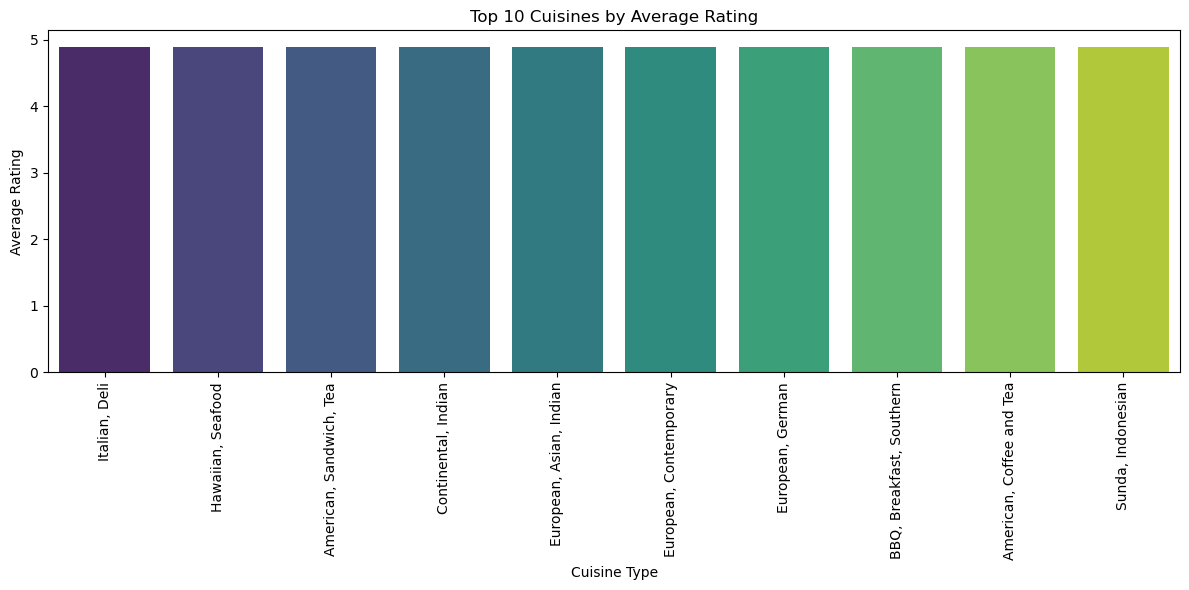

In [753]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisines', y='Aggregate rating', data=cuisine_ratings, palette='viridis')

# Customize the plot
plt.title('Top 10 Cuisines by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

**High Ratings for Top Cuisines:** Cuisines like Italian, Deli and Hawaiian, Seafood consistently score high with an average rating of 4.9.

**Combination Cuisines Perform Well:** Diverse combinations (e.g., European, Asian, Indian) attract broader preferences and earn higher ratings.

**Global & Niche Appeal:** Popular cuisines (European, Continental) and niche ones (Sunda, Indonesian, Hawaiian, Seafood) both achieve top ratings, reflecting quality and specialization.

#### 2. Identify the most popular cuisines among customers based on the number of votes.

In [757]:
# Gruop by 'Cuisines' and sum votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort the cuisines by the number of votes in descending order
popular_cuisines = popular_cuisines.sort_values('Votes', ascending=False).head(10)

# Display top cuisines by votes
print('Top cuisines by votes :')
print(popular_cuisines.head(10))

Top cuisines by votes :
                            Cuisines  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  48967
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799


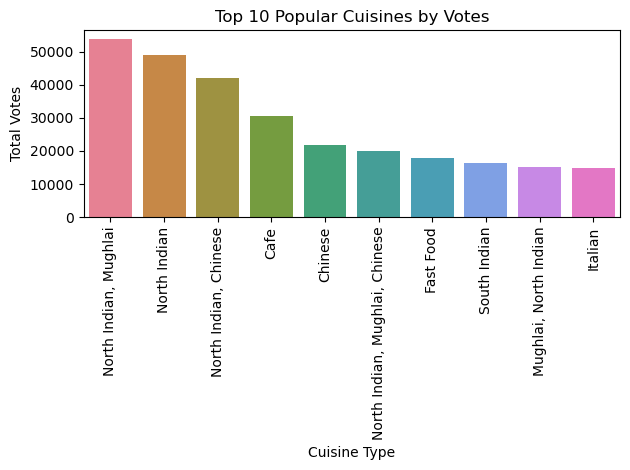

In [759]:
# Visualize the result
sns.barplot(x='Cuisines', y='Votes', data=popular_cuisines, palette='husl')

# Customize the plot
plt.title('Top 10 Popular Cuisines by Votes')
plt.ylabel('Total Votes')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

North Indian cuisine, especially combinations like North Indian, Mughlai and North Indian, Chinese, leads in popularity with the highest number of votes. Other popular cuisines include Cafe, Chinese, Mughlai, and Fast Food, reflecting a mix of regional and specialty preferences. South Indian and Italian also feature prominently, indicating diverse customer tastes.

#### 3. Determine if there are any specific cuisines that tend to receive higher ratings.

                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, Southern               4.9
41    American, Coffee and Tea               4.9
1779         Sunda, Indonesian               4.9


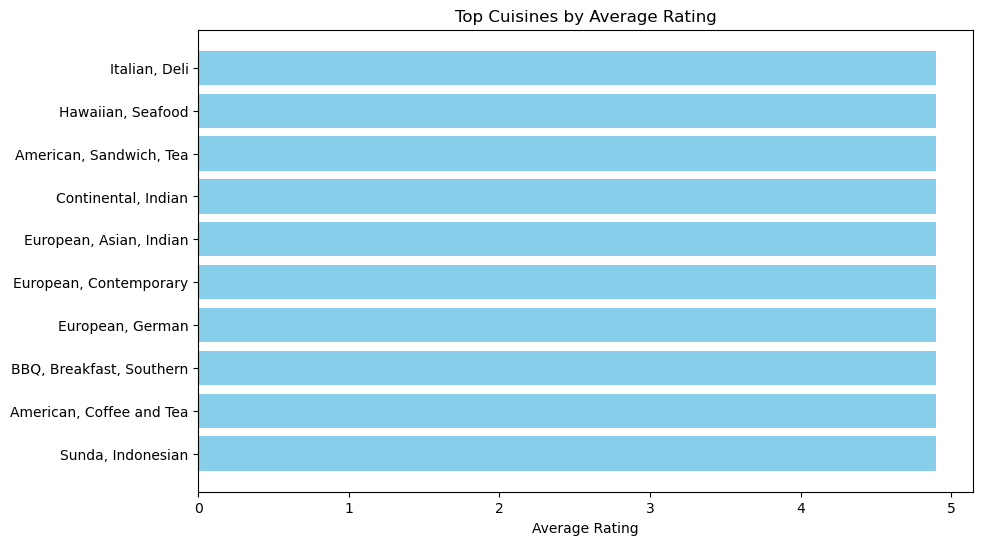

In [763]:
# Group by 'Cuisines' and calculate the average rating
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by average rating in descending order
cuisine_avg_rating_sorted = cuisine_rating.sort_values(by='Aggregate rating', ascending=False)

# Plot top cuisines by average rating
plt.figure(figsize=(10,6))
top_cuisines = cuisine_avg_rating_sorted.head(10)
# Print the top cuisines with their average ratings
print(top_cuisines)

plt.barh(top_cuisines['Cuisines'], top_cuisines['Aggregate rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top Cuisines by Average Rating')
plt.gca().invert_yaxis()  # To display highest ratings on top
plt.show()



Certain cuisines, especially those with diverse or specialized combinations, tend to receive higher ratings. Cuisines like Italian, Deli, Hawaiian, Seafood, and American, Sandwich, Tea consistently achieve high average ratings of 4.9, indicating strong customer satisfaction. The combination of different culinary styles, such as Continental, Indian or European, Asian, Indian, also appears to lead to elevated ratings, suggesting that customers favor unique and varied dining experiences. Overall, cuisines offering a blend of different flavors or those with a distinct regional focus are more likely to receive higher ratings.

### Task 3 : * Data Visualization *

#### Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

#### 1. Histogram

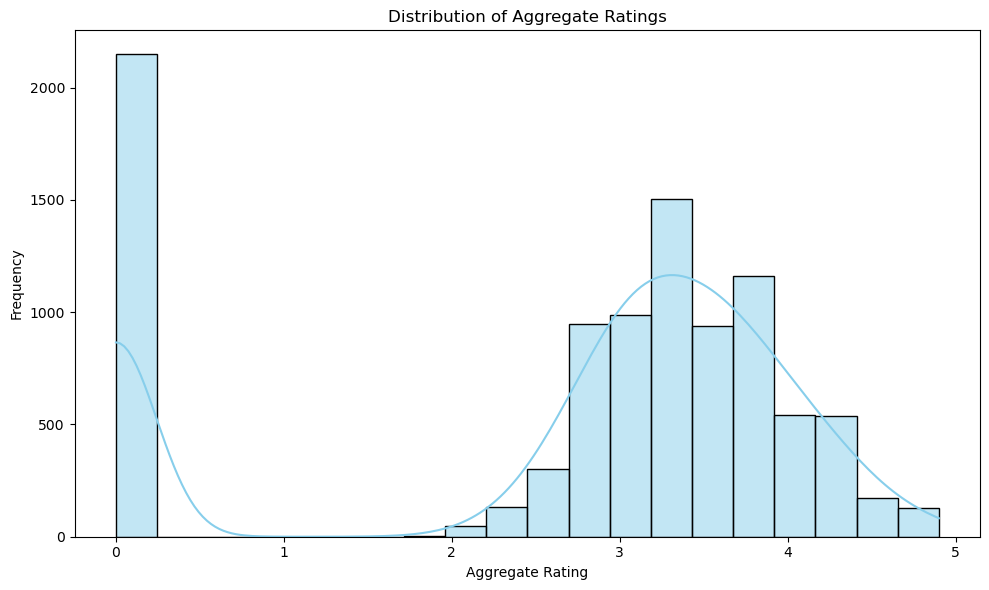

In [770]:
# Plotting the histogram for the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], kde=True, color='skyblue', bins=20)

# Customizing the plot
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout for better display
plt.show()

 From the histogram, it's clear that the ratings are heavily skewed towards 2.5 to 4.0, showing most restaurants fall in the average to good range. The large spike at 0.0 likely indicates many unrated restaurants. Only a small fraction manage to achieve ratings above 4.5, highlighting the imbalance towards mid-range ratings.

#### 2. Bar Plot ('Rating Frequency by Rating Value')

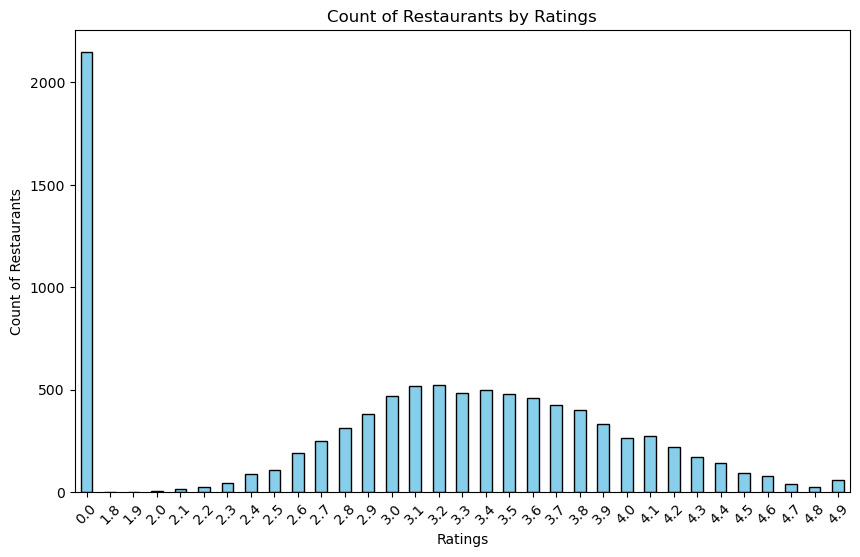

In [95]:
# Plotting a bar plot for count of ratings
rating_counts = df['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='skyblue',edgecolor='black')
plt.title('Count of Restaurants by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=45)
plt.show()

#### 2. Compare the average ratings of different cuisines or cities using appropriate visualizations

                 City  Aggregate rating
56         Inner City          4.900000
107       Quezon City          4.800000
73        Makati City          4.650000
95         Pasig City          4.633333
75   Mandaluyong City          4.625000
15         Beechworth          4.600000
67             London          4.535000
123       Taguig City          4.525000
122     Tagaytay City          4.500000
116      Secunderabad          4.500000


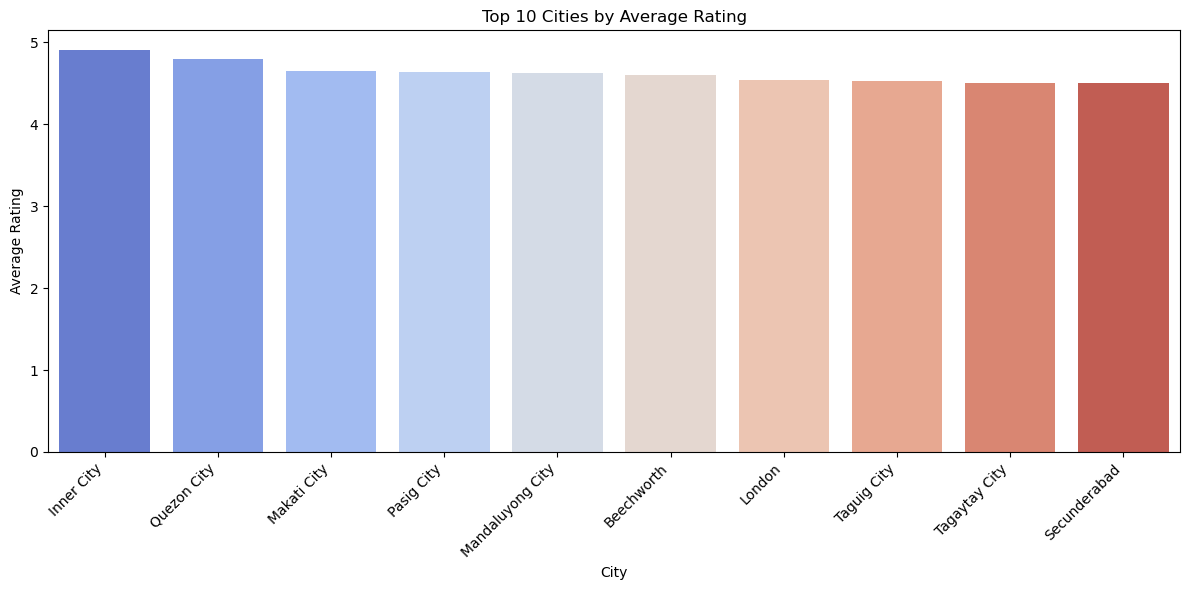

In [780]:
# Group by 'City' and calculate the average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by ratings in descending order and limit to the top 10 cities
city_ratings = city_ratings.sort_values('Aggregate rating', ascending=False).head(10)
print(city_ratings.head(10))

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Aggregate rating', data=city_ratings, palette='coolwarm')

# Customize the plot
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

The cities with the highest average ratings are Inner City (4.9) and Quezon City (4.8), indicating that restaurants in these areas tend to receive higher customer satisfaction. Other cities like Makati City (4.65) and Pasig City (4.63) also show relatively high ratings, while cities such as Secunderabad and Tagaytay City have slightly lower averages around 4.5. Overall, the data suggests that some cities consistently provide higher-rated dining experiences, while others have slightly lower but still strong ratings.

#### 3.Visualize the relationship between various features and the target variable to gain insights

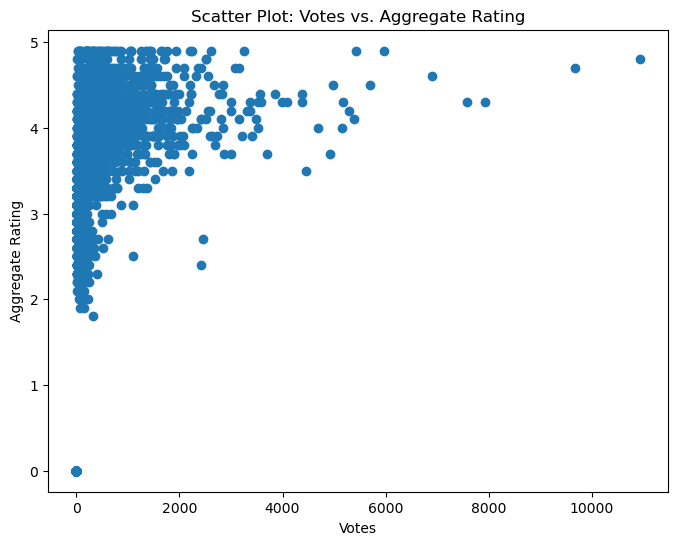

In [111]:
# Scatter plot to analyze the relationship between Votes and Average cost for two
plt.figure(figsize=(8,6))
plt.scatter(x='Votes', y='Aggregate rating', data=df )
plt.title('Scatter Plot: Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

The scatter plot shows a positive relationship between votes and aggregate ratings. Restaurants with higher ratings tend to receive more votes, indicating that popular and well-rated restaurants attract greater engagement.

In [790]:
# Violin Plot for Aggregate Rating vs. Has Table Booking

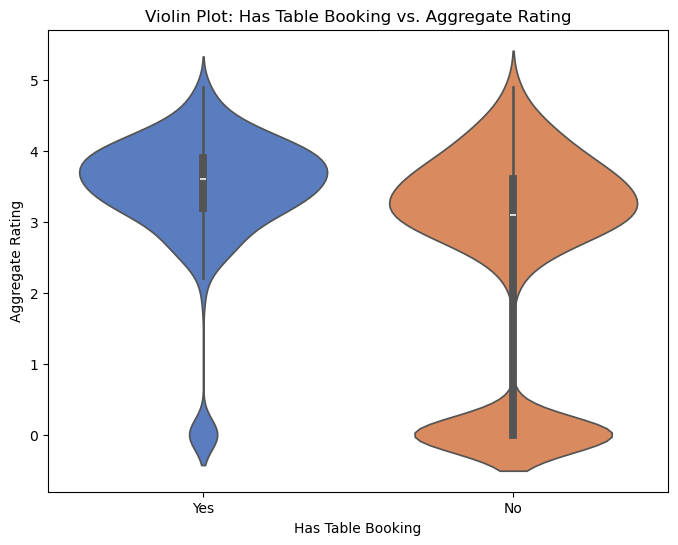

In [114]:
# Violin plot for Aggregate Rating based on Has Table Booking
plt.figure(figsize=(8,6))
sns.violinplot(x='Has Table booking', y='Aggregate rating', data=df, palette='muted')
plt.title('Violin Plot: Has Table Booking vs. Aggregate Rating')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()

The violin plot compares the aggregate ratings of restaurants based on whether they offer table booking or not. The observations are:

* Higher Ratings for Table Booking: Restaurants with table booking ("Yes") generally have higher aggregate ratings, with a concentration around 4 to 5.

* Lower Ratings for No Table Booking: Restaurants without table booking ("No") show a wider distribution, with a noticeable concentration around ratings of 3 to 4, indicating comparatively lower ratings overall.

* In conclusion, restaurants offering table booking tend to receive higher aggregate ratings compared to those that do not.


In [794]:
# Violin Plot for Aggregate Rating vs. Has Online Delivery

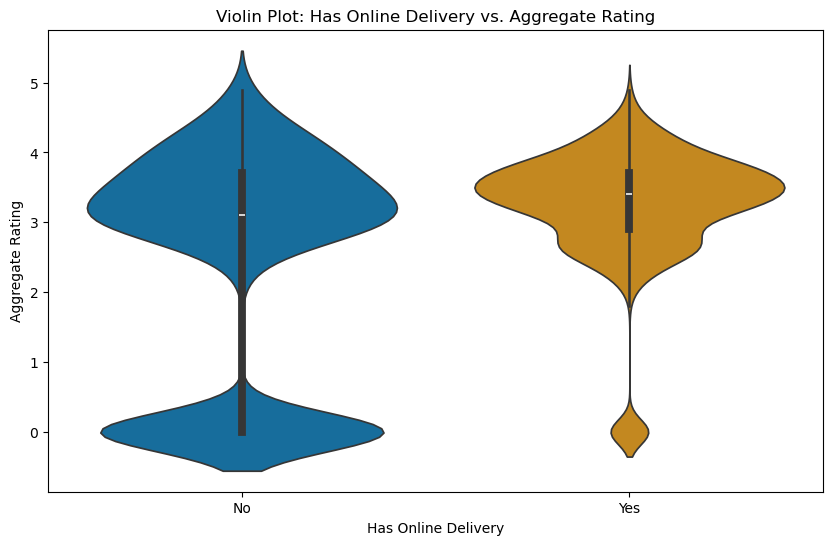

In [796]:
# Violin plot for Aggregate Rating based on Has Online Delivery
plt.figure(figsize=(10,6))
sns.violinplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='colorblind')
plt.title('Violin Plot: Has Online Delivery vs. Aggregate Rating')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()

The violin plot compares aggregate ratings of restaurants based on whether they offer online delivery. The observations are:

* Higher Ratings Without Online Delivery: Restaurants without online delivery ("No") generally have higher aggregate ratings, with a concentration in the 3.5 to 4.5 range.

* Lower Ratings With Online Delivery: Restaurants with online delivery ("Yes") have a wider spread, with a concentration around 3 to 4. The ratings tend to be slightly lower compared to those without online delivery.

* In conclusion, restaurants without online delivery tend to receive slightly higher aggregate ratings than those offering online delivery.

In [105]:
# Calculate average Aggregate Rating for each Rating Color
rating_summary = df.groupby('Rating color')['Aggregate rating'].mean().reset_index()
print("Average Aggregate Rating by Rating Color:")
print(rating_summary)

Average Aggregate Rating by Rating Color:
  Rating color  Aggregate rating
0   Dark Green          4.659801
1        Green          4.168119
2       Orange          3.051619
3          Red          2.297849
4        White          0.000000
5       Yellow          3.683429


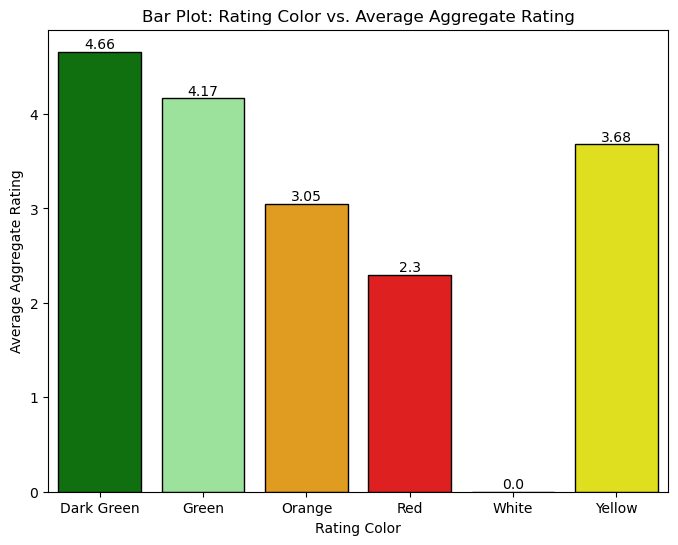

In [118]:
# Bar Plot 
custom_colors = ['green', 'lightgreen', 'orange','red', 'white','yellow']
plt.figure(figsize=(8,6))
sns.barplot(x='Rating color', y='Aggregate rating', data=rating_summary, ci=None, palette=custom_colors,edgecolor='black')

# Annotate the values on the bars
for index, row in rating_summary.iterrows():
    plt.text(index, row['Aggregate rating'], round(row['Aggregate rating'], 2), 
             color='black', ha="center", va="bottom", fontsize=10)

plt.title('Bar Plot: Rating Color vs. Average Aggregate Rating')
plt.xlabel('Rating Color')
plt.ylabel('Average Aggregate Rating')
plt.show()

The bar plot shows the relationship between rating colors and the average aggregate ratings. From the graph, we can conclude:

Dark Green has the highest average aggregate rating (4.66), indicating it is associated with excellent ratings.

Green follows with a slightly lower but still high average rating (4.17), also reflecting positive feedback.

Yellow (3.68) indicates moderately good ratings.

Orange (3.05) and Red (2.3) are linked to lower ratings, with Red having the lowest, indicating poor feedback.

White (0.0) has no associated ratings, suggesting it might represent unrated or neutral data.

In summary, the darker green shades correspond to higher satisfaction levels, while red and orange are associated with lower satisfaction. This color-coded scheme effectively reflects the quality of ratings.

#### **Here is a concise overview of my findings**

**Task 1 : Predictive Modeling**

I built a regression model to predict the aggregate rating of a restaurant using the available features. The dataset was split into training and testing sets, and I evaluated the model's performance using appropriate metrics.

I tried three algorithms:

Linear Regression: It performed decently but couldn’t capture complex, non-linear relationships.

Decision Tree: It did much better than Linear Regression and handled non-linear patterns effectively.

Random Forest: It was slightly better than Decision Tree, with higher accuracy and robustness thanks to ensemble averaging.

Conclusion: Random Forest gave the best results, with a slight edge over Decision Tree, while Linear Regression didn’t perform as well.

**Task 2: Customer Preference Analysis**

I analyzed customer preferences based on cuisine types and restaurant ratings, focusing on three key aspects:

High-Rating Cuisines:

Cuisines like Italian, Deli, Hawaiian, and Seafood consistently achieved high average ratings of 4.9.
Diverse combinations, such as European, Asian, and Indian, performed well, attracting broader customer preferences.
Both globally popular (European, Continental) and niche cuisines (Sunda, Indonesian, Hawaiian) earned top ratings, reflecting quality and specialization.

Most Popular Cuisines:

North Indian cuisine led in popularity, particularly combinations like North Indian-Mughlai and North Indian-Chinese.
Other highly voted cuisines included Cafe, Chinese, Mughlai, Fast Food, South Indian, and Italian, highlighting diverse customer tastes.

Cuisines with Higher Ratings:

Specialized or diverse combinations, such as Italian, Deli, Hawaiian, Seafood, American-Sandwich-Tea, and Continental-Indian, consistently received higher ratings.
Unique and varied culinary experiences tend to resonate well with customers, driving higher satisfaction.

Conclusion: Customers appreciate a mix of diverse and niche cuisines, with specialized offerings and unique combinations often achieving higher ratings and popularity.

**Task 3: Data Visualization Summary**

I created various visualizations to analyze and represent data trends, focusing on rating distribution, cuisine and city comparisons, and feature-target relationships.

Distribution of Ratings:

The histogram shows ratings are heavily skewed towards the 2.5 to 4.0 range, with most restaurants rated average to good. A spike at 0.0 indicates many unrated restaurants. Only a few achieve ratings above 4.5, highlighting a mid-range rating concentration.
The bar plot further confirms this, showing the count of restaurants in each rating category. The mid-range (2.5–4.0) dominates, while high ratings (4.5+) are rare.

Cuisine and City Comparisons:

Using bar plots, I found that cities like Inner City (4.9) and Quezon City (4.8) have the highest average ratings, suggesting exceptional dining experiences. Makati City (4.65) and Pasig City (4.63) follow closely, while cities like Secunderabad and Tagaytay have slightly lower averages around 4.5.
The analysis highlights that certain cities consistently deliver higher-rated dining experiences, while others still maintain relatively strong ratings.

Feature-Target Relationships:

Votes vs. Ratings (Scatter Plot): A positive relationship exists—restaurants with higher ratings attract more votes, showing greater engagement with popular venues.

Table Booking (Violin Plot): Restaurants with table booking generally achieve higher ratings (4–5), while those without table booking cluster around 3–4.

Online Delivery (Violin Plot): Restaurants without online delivery have slightly higher ratings (3.5–4.5) than those with online delivery, which cluster around 3–4.

Rating Colors (Bar Plot):
Dark Green (4.66) and Green (4.17) represent the highest ratings, indicating strong customer satisfaction.
Yellow (3.68) reflects moderate feedback, while Orange (3.05) and Red (2.3) signify lower satisfaction.
White (0.0) indicates unrated or neutral data.

Conclusion: The visualizations provided clear insights into customer preferences and satisfaction. Features like table booking and the absence of online delivery positively influence ratings, while rating colors effectively summarize satisfaction levels.